In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Si vous executer ce fichier depuis Google Colab, décommentez le code suivant**

In [3]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cardio_train.csv', delimiter=';')
data.head()

Mounted at /content/drive


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Si vous executer ce fichier depuis votre ordinateur (votre environnement local), décommenter le code suivant**

In [4]:
#data = pd.read_csv('cardio_train.csv', delimiter=';')
#data.head()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
# Convertir l'âge de jours en années
data['age'] = round(data['age'] // 365)
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Analyse des caractéristique objectives

Text(0.5, 1.0, "Boxplot pour l'âge")

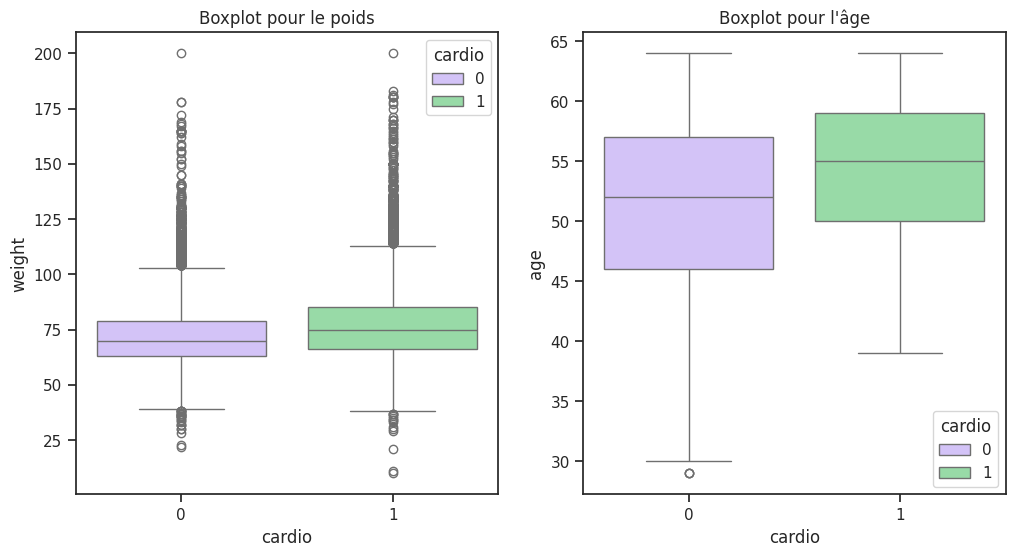

In [8]:
sns.set_theme(style="ticks", palette="pastel")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Boxplot pour le poids en fonction de la variable cible "cardio"
sns.boxplot(x="cardio", y="weight",
            hue="cardio", palette=["m", "g"],
            data=data, ax=axes[0])

# Boxplot pour l'âge en fonction de la variable cible "cardio"
sns.boxplot(x="cardio", y="age",
            hue="cardio", palette=["m", "g"],
            data=data, ax=axes[1])

axes[0].set_title('Boxplot pour le poids')
axes[1].set_title('Boxplot pour l\'âge')

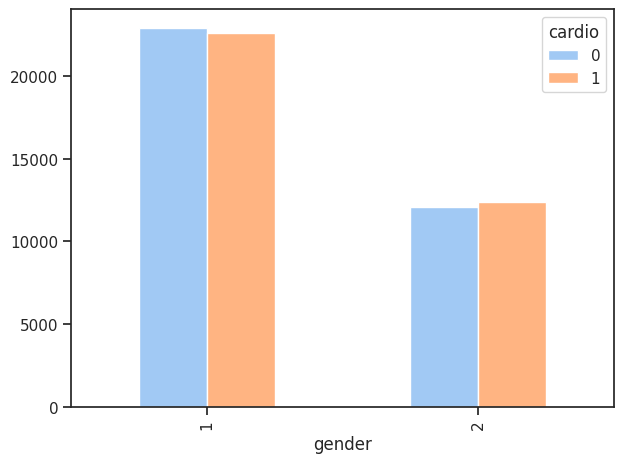

In [9]:
gender_crosstab = pd.crosstab(index=data['gender'], columns=data['cardio'], margins=True)
gender_crosstab.drop(['All'], axis=1, inplace=True)
gender_crosstab.drop(['All'], axis=0, inplace=True)

#fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))
gender_crosstab.plot(kind='bar')
plt.tight_layout()
plt.show()

### Conclusion
Dans ce jeu de données :
- Les __femmes__ qui souffrent d'une maladie cardio-vasculaire sont __*moins*__ des femmes qui sont saines
- Les __hommes__ qui souffrent d'une maladie cardio-vasculaire sont __*plus*__ des femmes qui sont sains

<Axes: xlabel='age'>

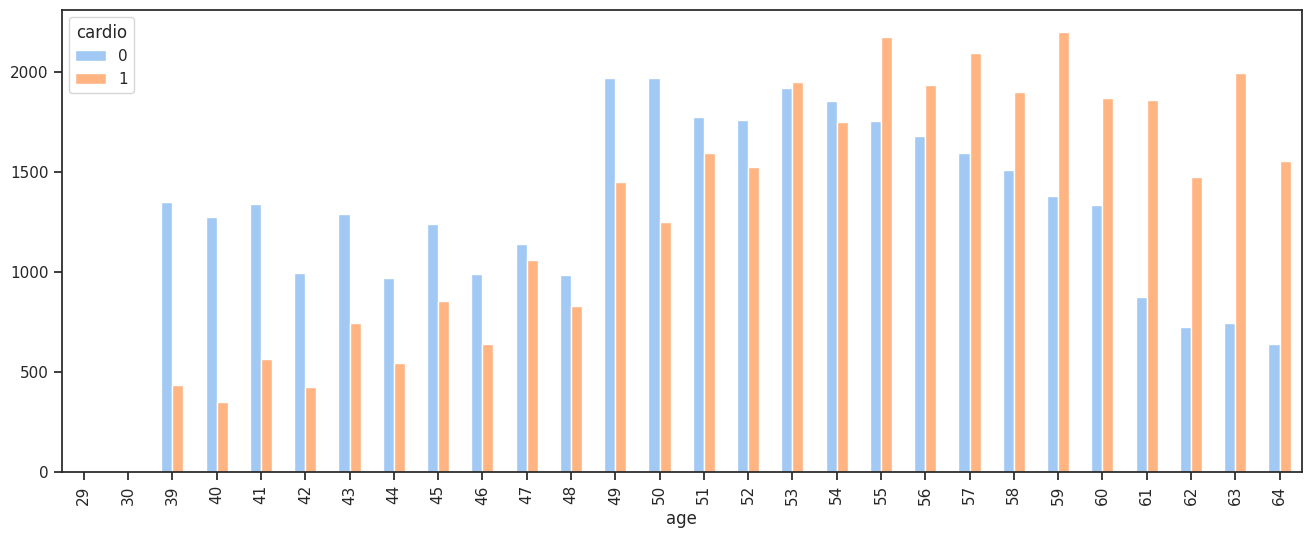

In [10]:
age_crosstab = pd.crosstab(index=data['age'], columns=data['cardio'], margins=True)
age_crosstab.drop(['All'], axis=1, inplace=True)
age_crosstab.drop(['All'], axis=0, inplace=True)

fig, axes = plt.subplots(figsize=(16, 6))
age_crosstab.plot(kind='bar', ax=axes)

On remarque qu'à partir de 55 ans, le nombre des gens atteints par une maladie cardio-vasculaire depasse le nobre des gens sains

<Figure size 1000x600 with 0 Axes>

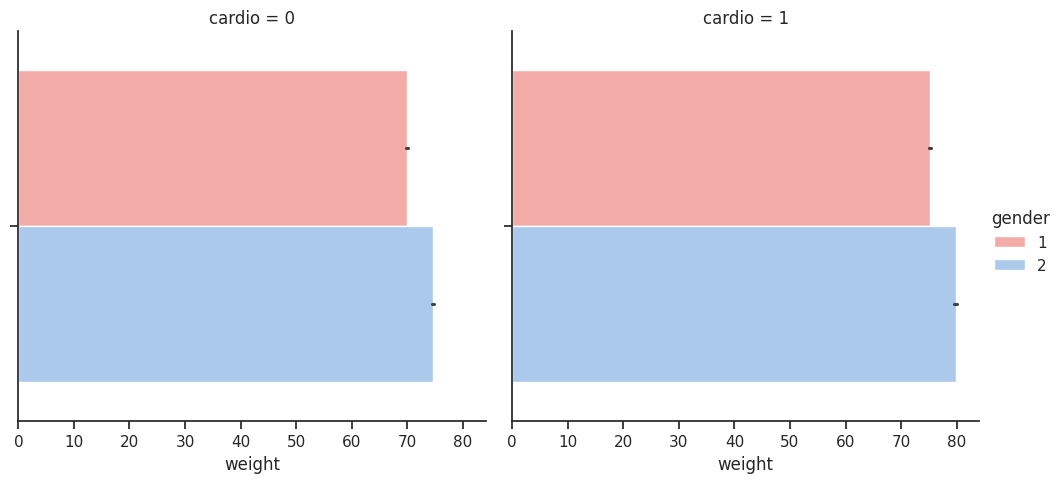

In [11]:
plt.figure(figsize=(10, 6))

sns.catplot(x="weight", hue="gender", col="cardio", data=data, kind='bar', palette=["r", "b"])

plt.show()


**Conclusion**
- Les personnes atteintes de maladie cardiovasculaire ont tendance à être plus âgées que les personnes non atteintes.

### Indice de masse corporelle

In [12]:
data['IMC'] = data['weight']/((data['height']/100)**2)

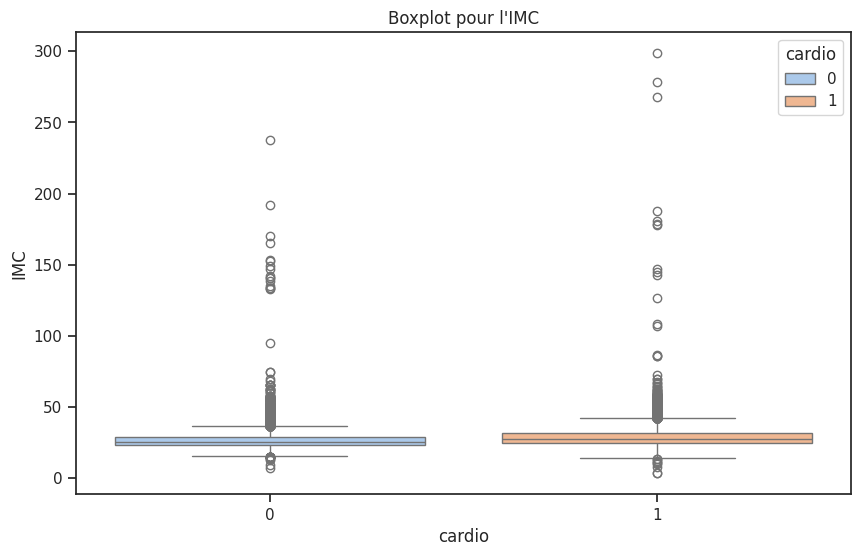

In [13]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='cardio', y='IMC', data=data, hue='cardio', palette='pastel')

plt.title('Boxplot pour l\'IMC')
plt.show()


On remarque des valeurs abérrantes comme 250 et 300 pour l'ICM, ce qui est impossible. c'est mieux de les enlever

In [14]:
cleaned_data = data[(10 < data['IMC']) & (data['IMC'] < 65)]

In [15]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69946 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69946 non-null  int64  
 1   age          69946 non-null  int64  
 2   gender       69946 non-null  int64  
 3   height       69946 non-null  int64  
 4   weight       69946 non-null  float64
 5   ap_hi        69946 non-null  int64  
 6   ap_lo        69946 non-null  int64  
 7   cholesterol  69946 non-null  int64  
 8   gluc         69946 non-null  int64  
 9   smoke        69946 non-null  int64  
 10  alco         69946 non-null  int64  
 11  active       69946 non-null  int64  
 12  cardio       69946 non-null  int64  
 13  IMC          69946 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 8.0 MB


<Figure size 1000x600 with 0 Axes>

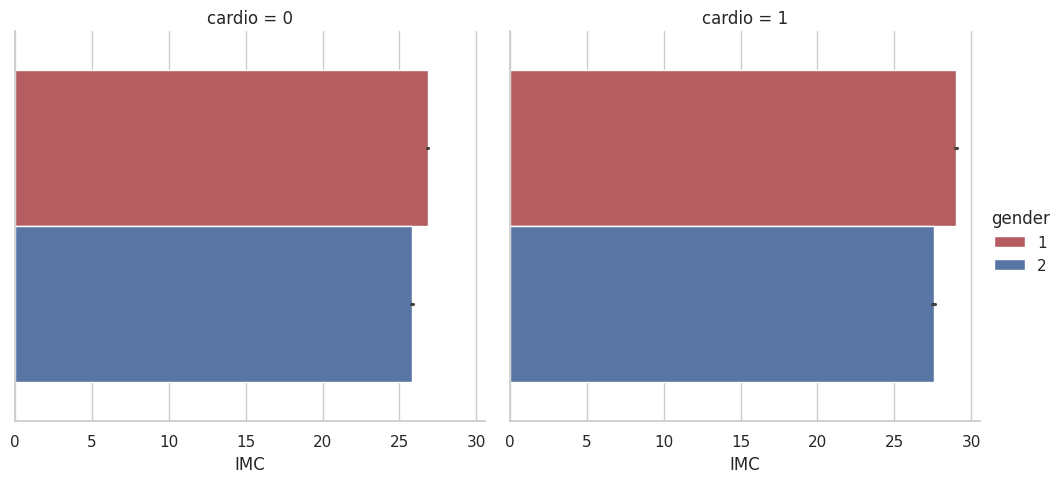

In [16]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.catplot(x="IMC", hue="gender", col="cardio", data=cleaned_data, kind='bar', palette=["r", "b"])

plt.show()

**Conclusion**
- Les personnes atteintes de maladie cardiovasculaire ont tendance à être plus lourdes que les personnes non atteintes.

# Analyse des caractéristiques de l’examen

## Distribution des pressions artérielles (ap_hi et ap_lo)

Text(0.5, 1.0, 'Boxplot pour ap_lo')

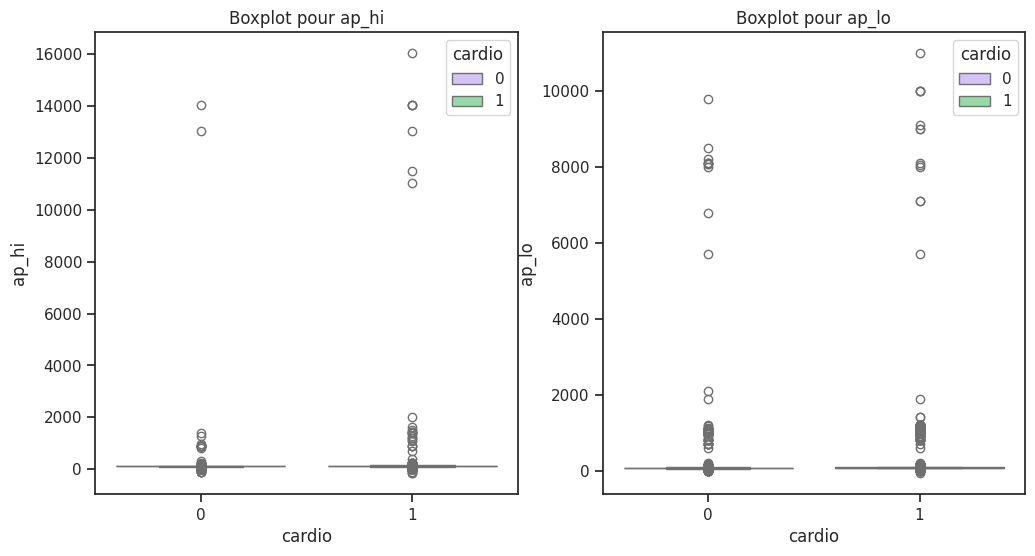

In [18]:
sns.set_theme(style="ticks", palette="pastel")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Boxplot pour la pression systolique (ap_hi) en fonction de la variable cible "cardio"
sns.boxplot(x="cardio", y="ap_hi",
            hue="cardio", palette=["m", "g"],
            data=cleaned_data, ax=axes[0])

# Boxplot pour la pression diastolique (ap_lo) en fonction de la variable cible "cardio"
sns.boxplot(x="cardio", y="ap_lo",
            hue="cardio", palette=["m", "g"],
            data=cleaned_data, ax=axes[1])

axes[0].set_title('Boxplot pour ap_hi')
axes[1].set_title('Boxplot pour ap_lo')

Des valeurs extrêmement élevées pour la pression artérielle systolique (ap_hi) ou la pression artérielle diastolique (ap_lo), telles que celles dépassant 10000, sont généralement considérées comme irréalistes et peuvent résulter d'erreurs de mesure ou de saisie de données. En pratique médicale, de telles valeurs sont inhabituelles et ne correspondent pas aux plages normales de la pression artérielle.

In [19]:
cleaned_data = cleaned_data.loc[(10 < data['ap_hi']) & (data['ap_hi'] < 250) & (10 < data['ap_lo']) & (data['ap_lo'] < 200)]

In [20]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68912 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68912 non-null  int64  
 1   age          68912 non-null  int64  
 2   gender       68912 non-null  int64  
 3   height       68912 non-null  int64  
 4   weight       68912 non-null  float64
 5   ap_hi        68912 non-null  int64  
 6   ap_lo        68912 non-null  int64  
 7   cholesterol  68912 non-null  int64  
 8   gluc         68912 non-null  int64  
 9   smoke        68912 non-null  int64  
 10  alco         68912 non-null  int64  
 11  active       68912 non-null  int64  
 12  cardio       68912 non-null  int64  
 13  IMC          68912 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 7.9 MB


## Relation entre la pression systolique et diastolique

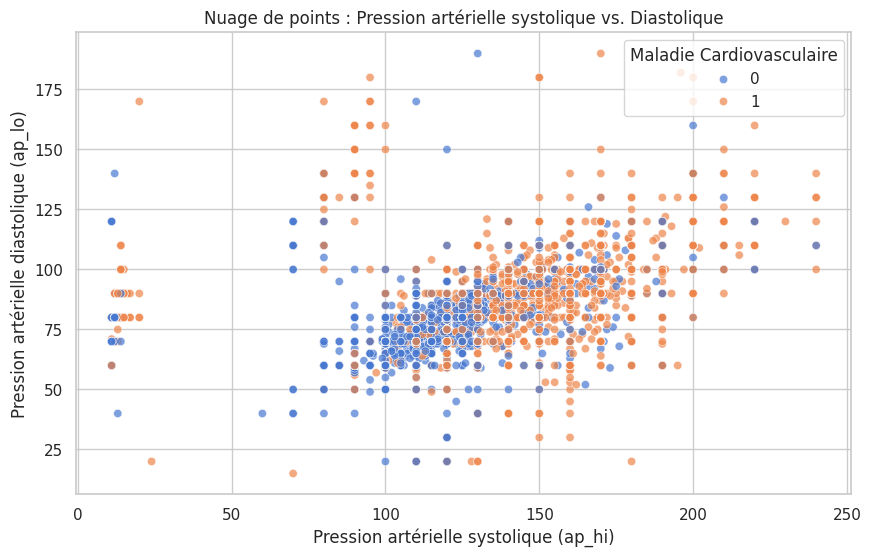

In [21]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x="ap_hi", y="ap_lo", hue="cardio", data=cleaned_data, palette="muted", alpha=0.7)
plt.title('Nuage de points : Pression artérielle systolique vs. Diastolique')
plt.xlabel('Pression artérielle systolique (ap_hi)')
plt.ylabel('Pression artérielle diastolique (ap_lo)')
plt.legend(title='Maladie Cardiovasculaire', loc='upper right')
plt.show()

**Conclusion**
- Le plot montre un nuage de points avec deux couleurs : rouge pour les personnes atteintes de maladie cardiovasculaire et bleu pour les personnes non atteintes. Les points rouges sont regroupés un peu en haut à droite du nuage. Cela signifie que les personnes atteintes de maladie cardiovasculaire ont tendance à avoir des valeurs de tension artérielle plus élevées que les personnes non atteintes.

## Répartition du cholestérol et de la glycémie

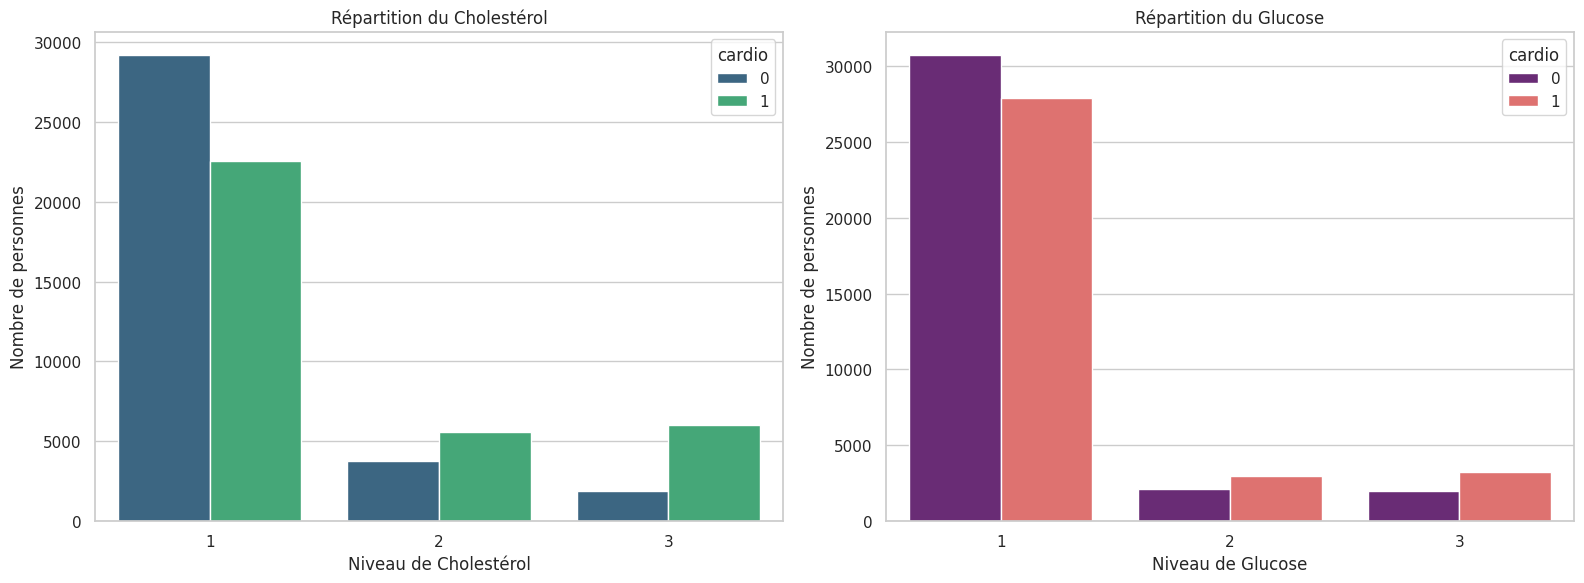

In [22]:
# Paramètres de style
sns.set_theme(style="whitegrid")

# Diagramme à barres pour le cholestérol
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='cholesterol', hue='cardio', data=cleaned_data, palette='viridis')
plt.title('Répartition du Cholestérol')
plt.xlabel('Niveau de Cholestérol')
plt.ylabel('Nombre de personnes')

# Diagramme à barres pour le glucose
plt.subplot(1, 2, 2)
sns.countplot(x='gluc', hue='cardio', data=cleaned_data, palette='magma')
plt.title('Répartition du Glucose')
plt.xlabel('Niveau de Glucose')
plt.ylabel('Nombre de personnes')

# Ajuste le layout
plt.tight_layout()

# Affiche la figure
plt.show()

**Conclusion**
- Si on se concentre sur les personnes souffrant d'une maladie cardio-vasculaire (cardio = 1). Le graphe montre qu'ils ont un niveau normal (1) de cholestérol et du glucose

## Visualisation avec des diagrammes en violon

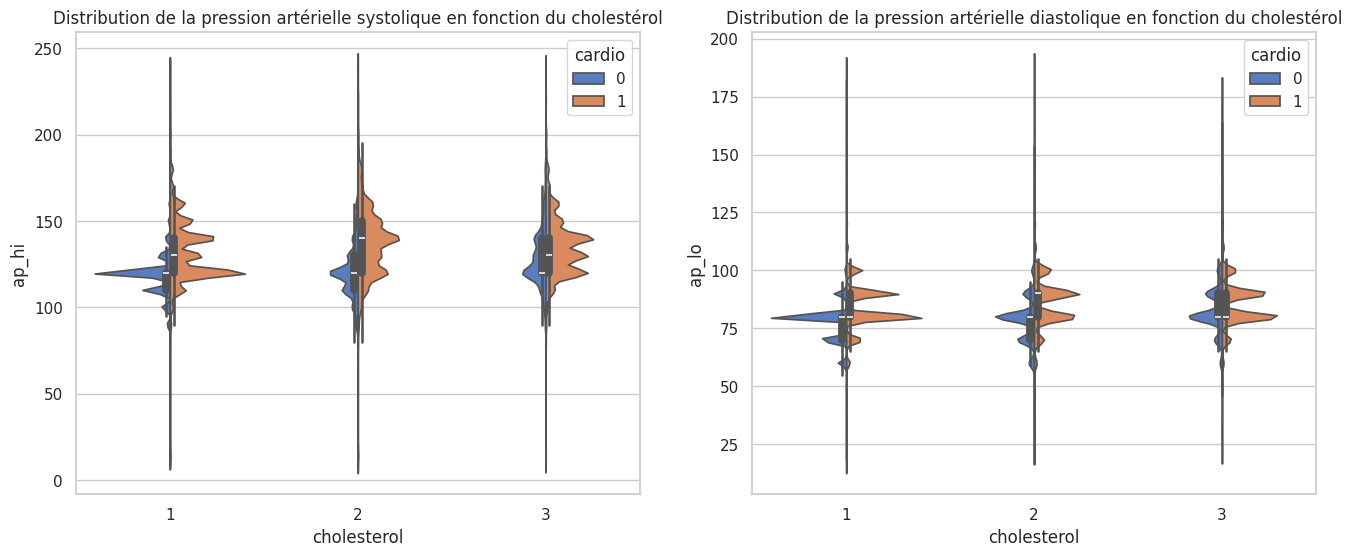

In [23]:
# Paramètres de style
sns.set_theme(style="whitegrid")

# Diagramme en violon pour la pression artérielle systolique en fonction du cholestérol
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.violinplot(x="cholesterol", y="ap_hi", hue="cardio", data=cleaned_data, split=True, palette="muted", ax=axes[0])
axes[0].set_title('Distribution de la pression artérielle systolique en fonction du cholestérol')

sns.violinplot(x="cholesterol", y="ap_lo", hue="cardio", data=cleaned_data, split=True, palette="muted", ax=axes[1])
axes[1].set_title('Distribution de la pression artérielle diastolique en fonction du cholestérol')
plt.show()


# Analyse des caractéristiques subjectives

## Tabac et tension arterielle

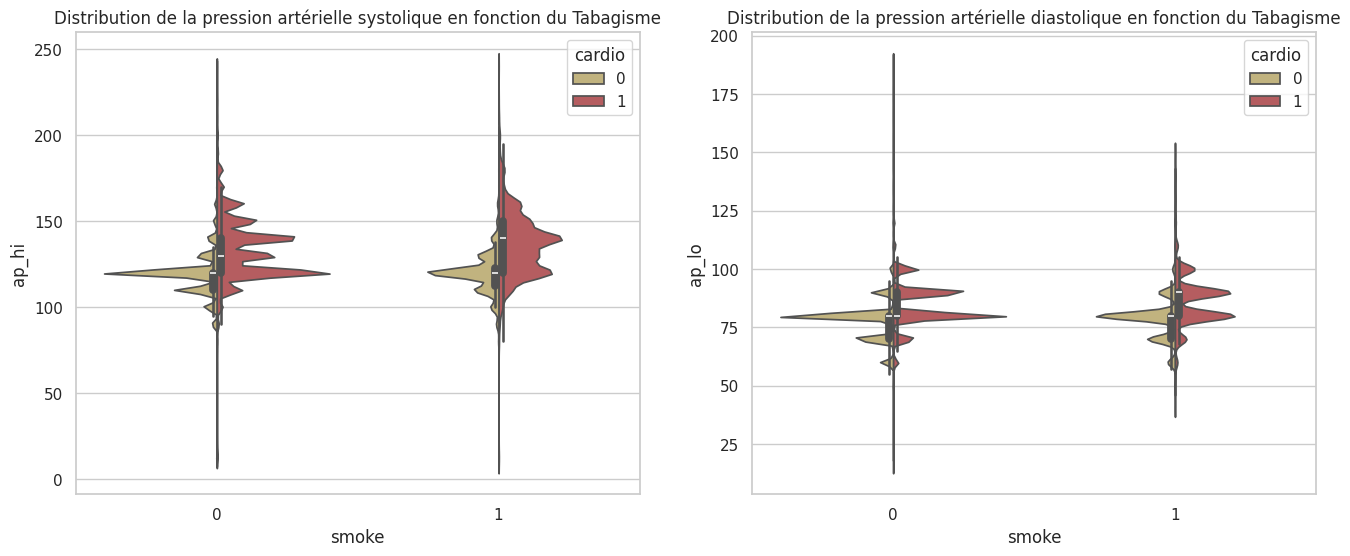

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.violinplot(x="smoke", y="ap_hi", hue="cardio", data=cleaned_data, split=True, palette=["y", "r"], ax=axes[0])
axes[0].set_title('Distribution de la pression artérielle systolique en fonction du Tabagisme')

sns.violinplot(x="smoke", y="ap_lo", hue="cardio", data=cleaned_data, split=True, palette=["y", "r"], ax=axes[1])
axes[1].set_title('Distribution de la pression artérielle diastolique en fonction du Tabagisme')
plt.show()

## Consommation d'alcool et l'activité physique en fonction de l'Indice de Masse Corporelle (IMC)

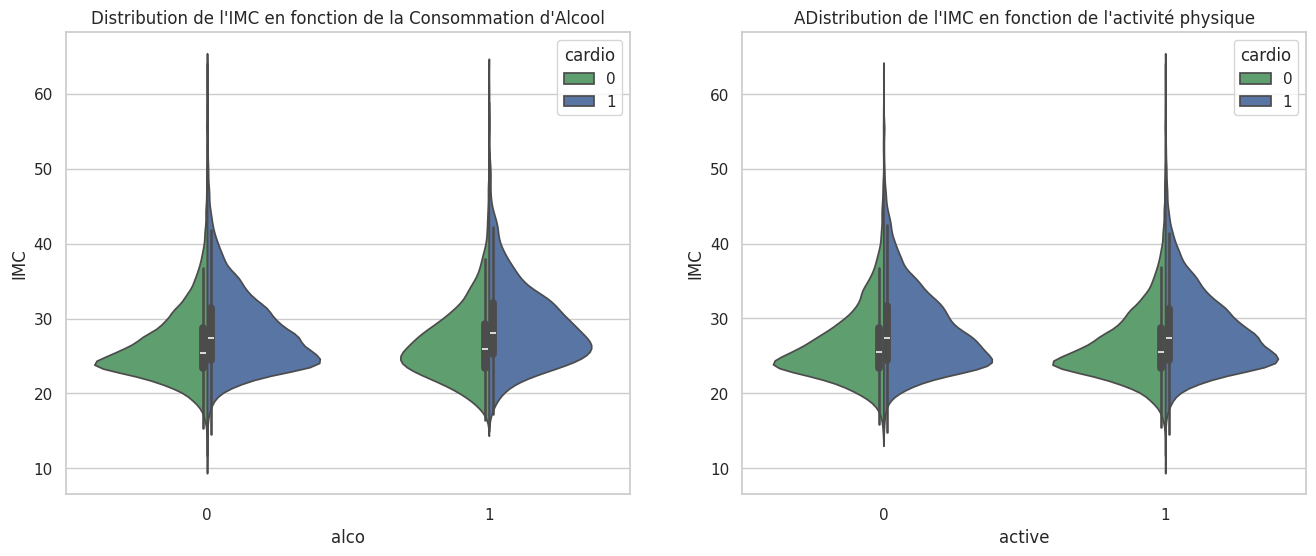

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.violinplot(x="alco", y="IMC", hue="cardio", data=cleaned_data, split=True, palette=["g", "b"], ax=axes[0])
axes[0].set_title('Distribution de l\'IMC en fonction de la Consommation d\'Alcool')

sns.violinplot(x="active", y="IMC", hue="cardio", data=cleaned_data, split=True, palette=["g", "b"], ax=axes[1])
axes[1].set_title('ADistribution de l\'IMC en fonction de l\'activité physique')
plt.show()

# Matrice de correlation

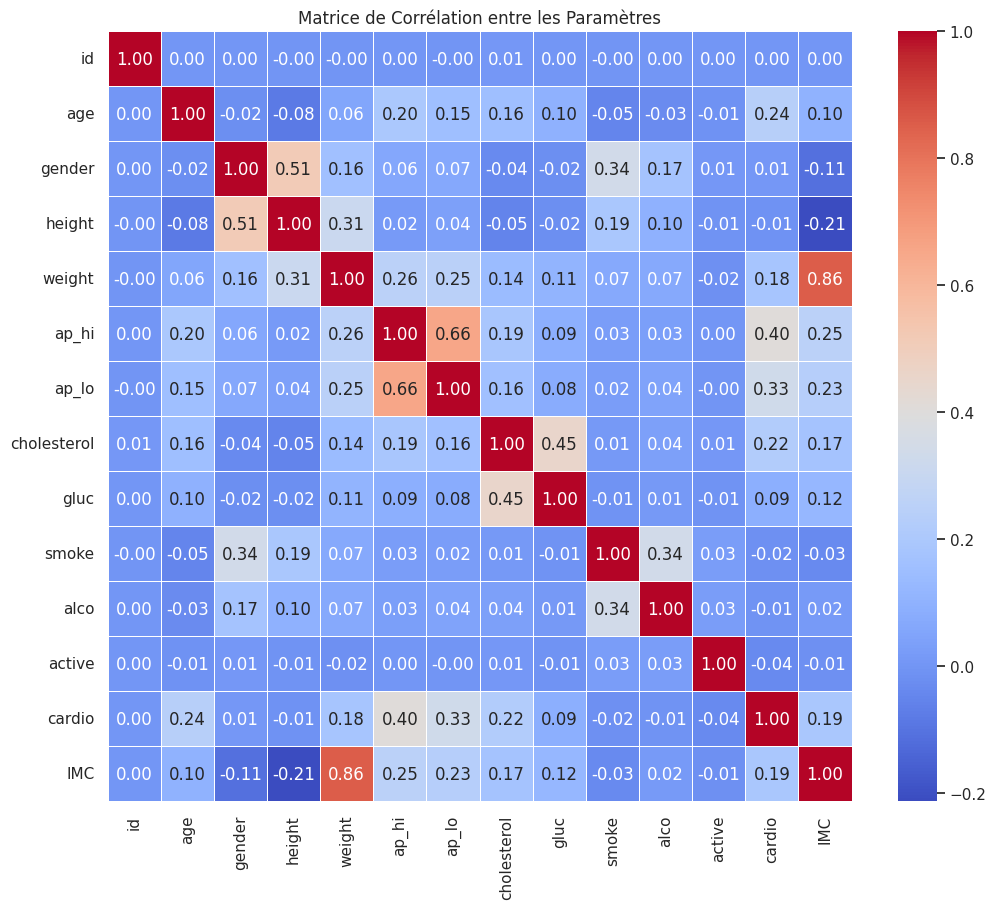

In [26]:
correlation_matrix = cleaned_data.corr()

# Paramètres de style
sns.set_theme(style="white")

# Création de la heatmap (carte thermique) de la matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation entre les Paramètres')
plt.show()

Les paramètres les plus corrélé avec la colonne `cardio` sont `ap_h`, `ap_lo`, `age`, `cholesterol` et `weight`

# Data split

In [27]:
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [28]:
X = cleaned_data.drop(columns=['cardio', 'id'])
y = cleaned_data[['cardio']]

In [29]:
# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Division de l'ensemble de test en ensembles de test et de validation
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Affichage des tailles des ensembles
print(f'Taille X_train : {X_train.shape}, Taille y_train : {y_train.shape}')
print(f'Taille X_test : {X_test.shape}, Taille y_test : {y_test.shape}')
print(f'Taille X_val : {X_val.shape}, Taille y_val : {y_val.shape}')

Taille X_train : (55129, 12), Taille y_train : (55129, 1)
Taille X_test : (6891, 12), Taille y_test : (6891, 1)
Taille X_val : (6892, 12), Taille y_val : (6892, 1)


In [30]:
scaler = StandardScaler()

# Normalisation des données
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

**Remarque**
- L'utilisation du scaler est une pratique courante pour garantir que toutes les fonctionnalités ont une échelle similaire, ce qui peut être important pour certains algorithmes d'apprentissage automatique.

La fonction suivante **TrainModel** prend en compte le modèle, les hyperparamètres, et les données d'entraînement, de test et de validation. Elle effectue une recherche sur grille pour trouver les meilleurs hyperparamètres, ajuste le modèle avec ces paramètres, puis calcule et retourne différentes métriques de performance. Enfin, elle ajoute ces résultats à un DataFrame qui conserve les scores pour différents modèles.

In [31]:
column_names = ['Name', 'Model_Score', 'Training_Score', 'Testing_Score', 'precision', 'recall', 'f1', 'accuracy']

score_df = pd.DataFrame(columns=column_names)

def TrainModel(name, model, param_grid, X_train, y_train, X_test, y_test, X_val, y_val, score_df):

    #pour eviter le werning : "A column-vector y was passed when a 1d array was expected."
    y_train_flatten = y_train["cardio"]

    grid_search = GridSearchCV(model, param_grid, scoring='accuracy')
    grid_search.fit(X_train, y_train_flatten)

    best_model = grid_search.best_estimator_
    print("best_model", best_model)

    best_params = grid_search.best_params_
    print("best_params", best_params)

    model_score = grid_search.best_score_
    training_score = best_model.score(X_train, y_train_flatten)
    testing_score = best_model.score(X_test, y_test)

    y_pred = best_model.predict(X_val)

    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)


    # Création d'un dictionnaire avec les informations
    result_dict = {'Name': name,
                   'Model_Score': model_score,
                   'Training_Score': training_score,
                   'Testing_Score': testing_score,
                   'precision' : precision,
                   'recall' : recall,
                   'f1' : f1,
                   'accuracy' : accuracy
                   }

    # Création d'un DataFrame avec une seule ligne
    result_df = pd.DataFrame([result_dict])

    # Ajout du DataFrame à la DataFrame principale
    score_df = pd.concat([score_df, result_df], ignore_index=True)


    return score_df

# Les modèles

### Logistic Regression

In [32]:
lr_params = {
    'penalty': ['elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [50000],
    'solver': ['saga'],
    'tol':[0.0001],
    'l1_ratio' : [0.2, 0.4, 0.6, 0.8]
}

score_df = TrainModel('LogisticRegression', LogisticRegression(),
           lr_params, X_train, y_train, X_test, y_test, X_val, y_val, score_df)

best_model LogisticRegression(C=1, l1_ratio=0.6, max_iter=50000, penalty='elasticnet',
                   solver='saga')
best_params {'C': 1, 'l1_ratio': 0.6, 'max_iter': 50000, 'penalty': 'elasticnet', 'solver': 'saga', 'tol': 0.0001}


### Decision Tree

In [33]:
dt_param_grid = {
    'criterion': ['entropy'],               # Fonction de critère pour la séparation
    'max_depth': list(np.arange(1,10)),     # Profondeur maximale de l'arbre
    'min_samples_leaf': np.arange(1,7),     # Nombre minimum d'échantillons requis dans une feuille
}

score_df = TrainModel('DecisionTreeClassifier', DecisionTreeClassifier(),
           dt_param_grid, X_train, y_train, X_test, y_test, X_val, y_val, score_df)

best_model DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)
best_params {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5}


### RandomForest

In [34]:
rf_param_grid = {
    'n_estimators': np.arange(100, 300, 20),  # Nombre d'arbres dans la forêt
}

score_df = TrainModel('RandomForestClassifier', RandomForestClassifier(),
           rf_param_grid, X_train, y_train, X_test, y_test, X_val, y_val, score_df)

best_model RandomForestClassifier(n_estimators=200)
best_params {'n_estimators': 200}


### KNN

In [35]:
knn_param_grid = {
    'n_neighbors': [5, 7, 9, 11],  # Nombre de voisins à considérer
}

score_df = TrainModel('KNN', KNeighborsClassifier(),
                      knn_param_grid, X_train, y_train, X_test, y_test, X_val, y_val, score_df)

best_model KNeighborsClassifier(n_neighbors=11)
best_params {'n_neighbors': 11}


### XGBoost

In [36]:
param_grid_xgb = {
    'colsample_bytree': [1.0],
    'gamma': [5, 7, 9],
    'learning_rate': [0.1, 0.2, 0.5],
    'max_depth': [3, 5, 7],
    'min_child_weight': [3, 5, 7],
    'n_estimators': [50, 100],
    'subsample': [0.8, 1.0]
}

score_df = TrainModel('XGBoost', XGBClassifier(),
                      param_grid_xgb, X_train, y_train, X_test, y_test, X_val, y_val, score_df)

best_model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
best_params {'colsample_bytree': 1.0, 'gamma': 5, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 1.0}


In [37]:
#Voir les resultats d'entrainement
score_df

,Name,Model_Score,Training_Score,Testing_Score,precision,recall,f1,accuracy
0,LogisticRegression,0.726841,0.726605,0.723698,0.754563,0.671598,0.710668,0.726494
1,DecisionTreeClassifier,0.731122,0.731194,0.726455,0.752104,0.674209,0.711030,0.725914
2,RandomForestClassifier,0.711459,0.980246,0.712233,0.708850,0.697128,0.702940,0.705311
3,KNN,0.712837,0.757623,0.711363,0.724660,0.694807,0.709419,0.715322
4,XGBoost,0.737017,0.740227,0.731824,0.759259,0.677981,0.716322,0.731428


__________________________________________________________________________

In [38]:
# Entraînement d'un modèle de réseau de neurones en utilisant la bibliothèque Keras avec TensorFlow comme backend.

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense


# Construction du modèle de réseau de neurones
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
1723/1723 [==============================] - 7s 3ms/step - loss: 0.5635 - accuracy: 0.7220 - val_loss: 0.5578 - val_accuracy: 0.7238
Epoch 2/20
1723/1723 [==============================] - 5s 3ms/step - loss: 0.5486 - accuracy: 0.7325 - val_loss: 0.5547 - val_accuracy: 0.7244
Epoch 3/20
1723/1723 [==============================] - 4s 2ms/step - loss: 0.5454 - accuracy: 0.7339 - val_loss: 0.5545 - val_accuracy: 0.7241
Epoch 4/20
1723/1723 [==============================] - 6s 3ms/step - loss: 0.5433 - accuracy: 0.7343 - val_loss: 0.5526 - val_accuracy: 0.7273
Epoch 5/20
1723/1723 [==============================] - 4s 2ms/step - loss: 0.5422 - accuracy: 0.7349 - val_loss: 0.5537 - val_accuracy: 0.7266
Epoch 6/20
1723/1723 [==============================] - 4s 2ms/step - loss: 0.5414 - accuracy: 0.7351 - val_loss: 0.5528 - val_accuracy: 0.7273
Epoch 7/20
1723/1723 [==============================] - 6s 3ms/step - loss: 0.5403 - accuracy: 0.7360 - val_loss: 0.5526 - val_accuracy:

**Conclusion**
- Le modèle est composé de trois couches denses, avec 256, 128 et 1 neurones dans chaque couche, respectivement. Le modèle est optimisé avec l'algorithme Adam et utilise la perte entropie croisée binaire comme fonction de perte.

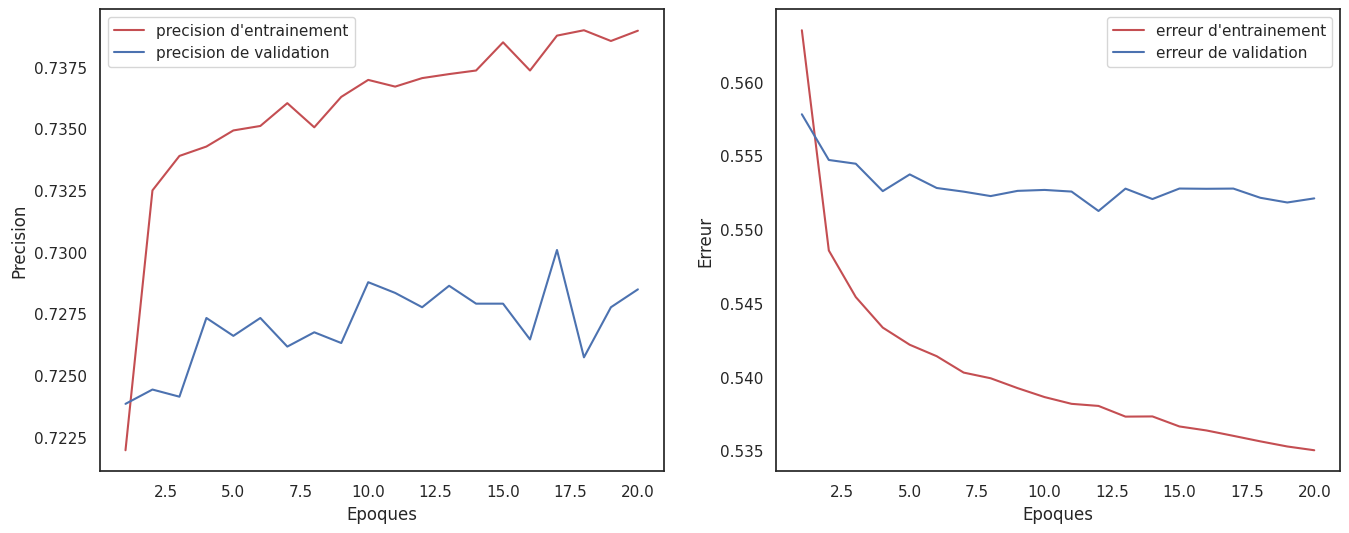

In [39]:
precision = history.history['accuracy']
val_precision = history.history['val_accuracy']
erreur = history.history['loss']
val_erreur = history.history['val_loss']

epoques = range(1, len(precision) + 1)

plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.plot(epoques, precision, 'r', label="precision d'entrainement")
plt.plot(epoques, val_precision, 'b', label="precision de validation")
plt.xlabel('Epoques')
plt.ylabel('Precision')
plt.legend()

plt.subplot(122)
plt.plot(epoques, erreur, 'r', label="erreur d'entrainement")
plt.plot(epoques, val_erreur, 'b', label="erreur de validation")
plt.xlabel('Epoques')
plt.ylabel('Erreur')
plt.legend()

plt.show()


Le premier graphique montre l'évolution de la précision d'entraînement et de validation au fil des époques. Le deuxième graphique montre l'évolution de l'erreur d'entraînement et de validation au fil des époques.

**Graphique 1**

- Le graphique 1 montre que la précision d'entraînement augmente rapidement au début de l'entraînement, puis augmente plus lentement jusqu'à atteindre environ 75%. La précision de validation augmente également au début de l'entraînement, mais elle stagne à environ 73% après 15 époques.

- Cette différence entre la précision d'entraînement et la précision de validation suggère que le modèle commence à surapprendre les données d'entraînement après 15 époques. Le surapprentissage est un problème courant dans l'apprentissage automatique, qui se produit lorsque le modèle apprend les détails spécifiques des données d'entraînement plutôt que les tendances générales des données.

**Graphique 2**

- Le graphique 2 montre que l'erreur d'entraînement diminue rapidement au début de l'entraînement, puis diminue plus lentement jusqu'à atteindre environ 0,5. L'erreur de validation diminue également au début de l'entraînement, mais elle stagne à environ 0,54 après 15 époques.

- La différence entre l'erreur d'entraînement et l'erreur de validation est similaire à la différence entre la précision d'entraînement et la précision de validation. Cela suggère que le modèle commence à surapprendre les données d'entraînement après 15 époques.

**Conclusion**

- En général, le modèle semble bien s'entraîner. La précision d'entraînement et l'erreur d'entraînement diminuent rapidement au début de l'entraînement, ce qui suggère que le modèle apprend rapidement les données. Cependant, la précision de validation stagne après 15 époques, ce qui suggère que le modèle commence à surapprendre les données.

- Il est possible d'améliorer les performances du modèle en arrêtant l'entraînement avant que le modèle ne commence à surapprendre. Cela peut être fait en définissant un nombre maximum d'époques ou en ajustant la valeur du paramètre de régularisation.

In [40]:
y_pred = model.predict(X_val)
y_pred_bin = (y_pred > 0.5).astype('int32')

precision = precision_score(y_val, y_pred_bin)
recall = recall_score(y_val, y_pred_bin)
f1 = f1_score(y_val, y_pred_bin)
accuracy = accuracy_score(y_val, y_pred_bin)

# Création d'un dictionnaire avec les informations
result_dict = {'Name': 'NearalNetwork',
               'Training_Score': precision,
               'Testing_Score': max(val_precision),
               'precision' : precision,
               'recall' : recall,
               'f1' : f1,
               'accuracy' : accuracy
               }

# Création d'un DataFrame avec une seule ligne
result_df = pd.DataFrame([result_dict])

result_df

216/216 [==============================] - 0s 1ms/step


,Name,Training_Score,Testing_Score,precision,recall,f1,accuracy
0,NearalNetwork,0.752107,0.730083,0.752107,0.698869,0.724511,0.734185


In [ ]:
#score_df = score_df.drop(score_df[score_df['Name'] == 'NearalNetwork'].index)

In [41]:
# Ajout du DataFrame à la DataFrame principale
score_df = pd.concat([score_df, result_df], ignore_index=True)
score_df

,Name,Model_Score,Training_Score,Testing_Score,precision,recall,f1,accuracy
0,LogisticRegression,0.726841,0.726605,0.723698,0.754563,0.671598,0.710668,0.726494
1,DecisionTreeClassifier,0.731122,0.731194,0.726455,0.752104,0.674209,0.711030,0.725914
2,RandomForestClassifier,0.711459,0.980246,0.712233,0.708850,0.697128,0.702940,0.705311
3,KNN,0.712837,0.757623,0.711363,0.724660,0.694807,0.709419,0.715322
4,XGBoost,0.737017,0.740227,0.731824,0.759259,0.677981,0.716322,0.731428
5,NearalNetwork,NaN,0.752107,0.730083,0.752107,0.698869,0.724511,0.734185


In [42]:
score_df['moyenne'] = score_df[['Testing_Score', 'precision', 'recall', 'f1', 'accuracy']].mean(axis=1)
score_df

,Name,Model_Score,Training_Score,Testing_Score,precision,recall,f1,accuracy,moyenne
0,LogisticRegression,0.726841,0.726605,0.723698,0.754563,0.671598,0.710668,0.726494,0.717404
1,DecisionTreeClassifier,0.731122,0.731194,0.726455,0.752104,0.674209,0.711030,0.725914,0.717942
2,RandomForestClassifier,0.711459,0.980246,0.712233,0.708850,0.697128,0.702940,0.705311,0.705292
3,KNN,0.712837,0.757623,0.711363,0.724660,0.694807,0.709419,0.715322,0.711114
4,XGBoost,0.737017,0.740227,0.731824,0.759259,0.677981,0.716322,0.731428,0.723363
5,NearalNetwork,NaN,0.752107,0.730083,0.752107,0.698869,0.724511,0.734185,0.727951


In [43]:
score_df.sort_values(by='moyenne', ascending=False)

,Name,Model_Score,Training_Score,Testing_Score,precision,recall,f1,accuracy,moyenne
5,NearalNetwork,NaN,0.752107,0.730083,0.752107,0.698869,0.724511,0.734185,0.727951
4,XGBoost,0.737017,0.740227,0.731824,0.759259,0.677981,0.716322,0.731428,0.723363
1,DecisionTreeClassifier,0.731122,0.731194,0.726455,0.752104,0.674209,0.711030,0.725914,0.717942
0,LogisticRegression,0.726841,0.726605,0.723698,0.754563,0.671598,0.710668,0.726494,0.717404
3,KNN,0.712837,0.757623,0.711363,0.724660,0.694807,0.709419,0.715322,0.711114
2,RandomForestClassifier,0.711459,0.980246,0.712233,0.708850,0.697128,0.702940,0.705311,0.705292


**Conclusion**
- On remarque que la plupart des modèles ont des performances proches.
- D'après le tableau, le meilleur modèle pour la prédiction de la maladie cardiovasculaire est le reseau de neurones. Ce modèle a la meilleure moyenne des scores 72,7%.
- Le XGBoost est le deuxième meilleur modèle, avec une moyenne de 72,3%.
- Les autres modèles ont des performances plus faibles, avec une moyenne inférieure à 72%.